In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob
plt.rcParams['figure.figsize'] = [13, 13]

In [21]:
data_folder = 'sun_azimuth/' 
data_folder2 = 'sun_elevation/'

el_files = glob.glob(data_folder2 + "sun_el_*")
el_files.sort()

az_files = glob.glob(data_folder + "sun*") 
az_files.sort()

In [22]:
az_spectra = [] # Create an empty array to later hold each of the spectra from the azimuthal scans

for az_file in az_files: #Pull each individual filename from the list of azimuth files
    
    with open(az_file) as az_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(az_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            
        az_spectra.append(tot_spectrum)
        


[1416.         1416.00977517 1416.01955034 ... 1425.98044966 1425.99022483
 1426.        ]


Text(0.5, 1.0, 'All 20 Azimuth Spectra Plotted Along Frequency')

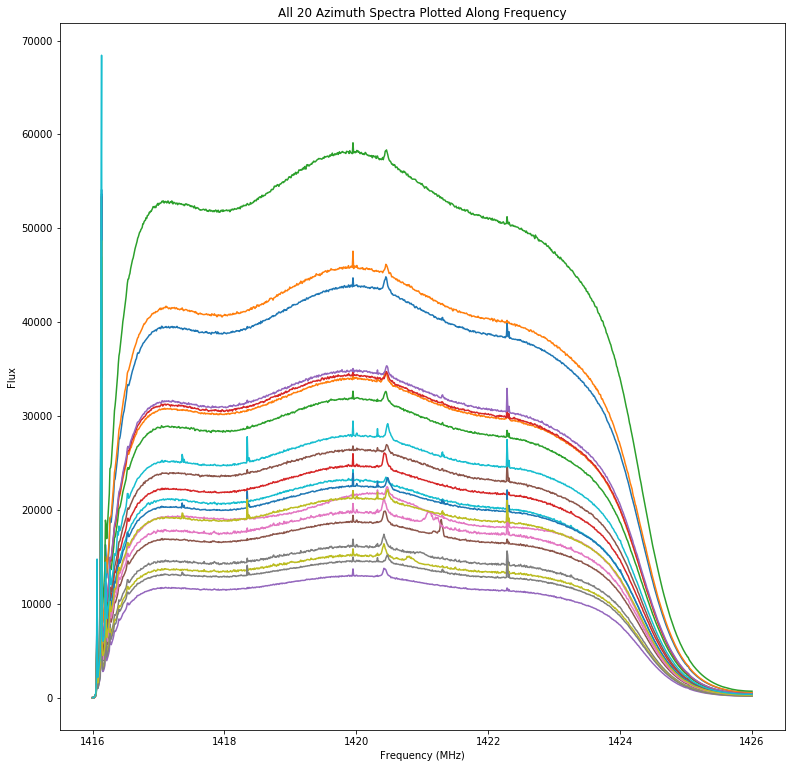

In [23]:
frequency = np.linspace(1416,1426,1024)#Fill with an array of numbers should have 1024 elements first one has 1416 
print(frequency)

for i in range (0,len(az_spectra)):
    plt.plot(frequency, az_spectra[i])   
    
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("All 20 Azimuth Spectra Plotted Along Frequency")

The initial and final frequency for our range: 
1416.215053763441
1424.3088954056695


Text(0.5, 1.0, 'All 20 Azimuth Spectra Plotted Along Frequency Adjusted')

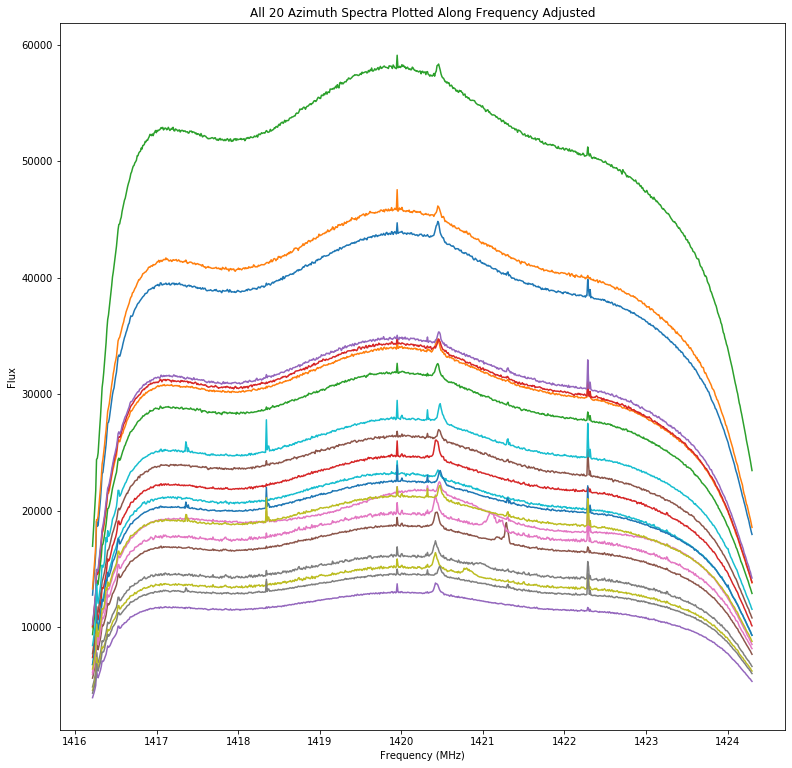

In [24]:
#Average over a range of frequencies for EACH az_spectra value

for i in range (0,len(az_spectra)):
    plt.plot(frequency[22:850],az_spectra[i][22:850])   
print("The initial and final frequency for our range: ")
print(frequency[22])
print(frequency[850])

plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("All 20 Elevation Spectra Plotted Along Frequency Adjusted")

In [25]:
az_spectrummean = np.zeros(len(az_spectra))
for i in range (0,20):
    az_spectrummean[i] = np.mean(az_spectra[i][22:850]) 
print("The averages for all the Azimuth Spectra at the given frequency range are: ", az_spectrummean)

The averages for all the Azimuth Spectra at the given frequency range are:  [37946.32130797 29398.10621739 27560.63483092 21389.59836353
 11256.70911594 16244.54649638 17179.10298068 13995.01472705
 13157.61111232 20025.63921618 19576.28894444 39620.05322585
 50259.85486836 29690.26332729 30170.2388744  22884.9015
 18352.18081643 12623.56843599 18456.36335628 24246.82210145]


Text(0.5, 1.0, 'Azimuth Flux Vs Angle')

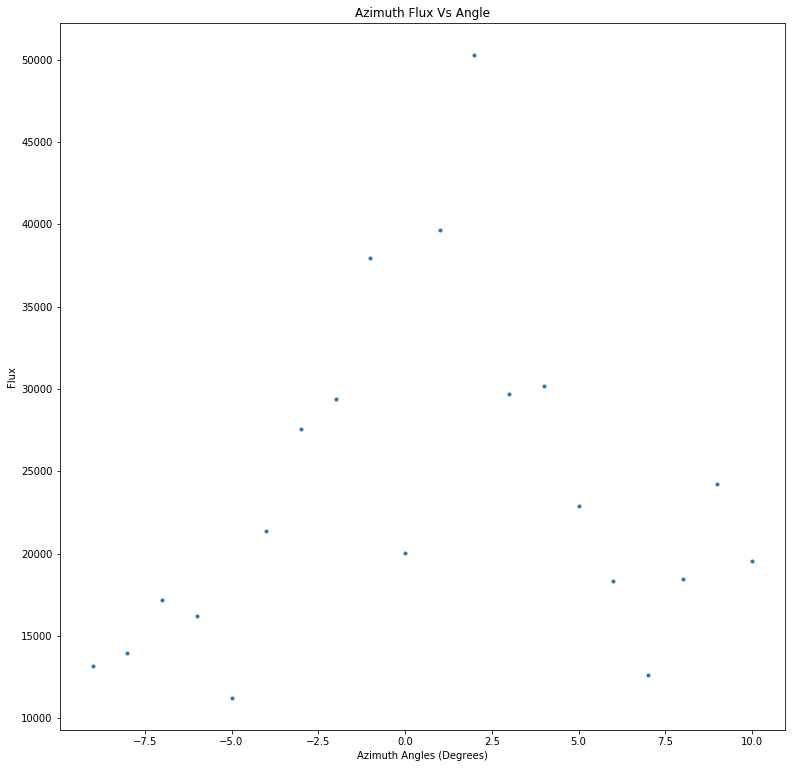

In [26]:
azimuth_final = np.array([-1,-2,-3,-4,-5,-6,-7,-8,-9,0,10,1,2,3,4,5,6,7,8,9])
plt.plot(azimuth_final, az_spectrummean, '.')
plt.xlabel("Azimuth Angles (Degrees)")
plt.ylabel("Flux")
plt.title("Azimuth Flux Vs Angle")

The estimates for amplitude, sigma, and mu are: 
a=40000, b=2, c=3


Text(0.5, 1.0, 'Flux vs Angle Fit with Gaussian Initial')

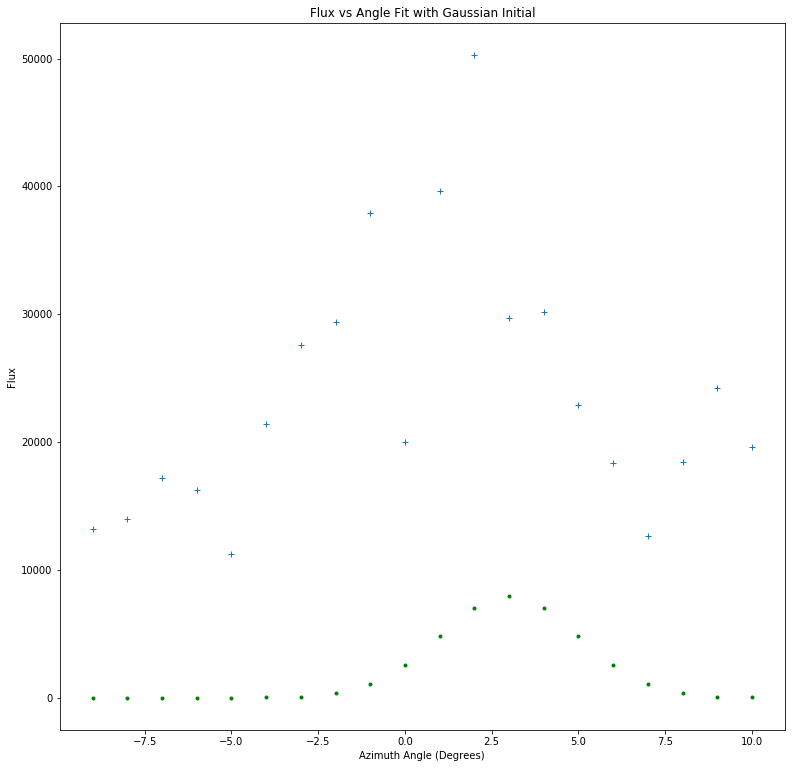

In [27]:
def gaussian_curve(x,a,b,c): #a= amplitude b=sigma, c=mu
    return a*(1/(b*np.sqrt(2*np.pi)))*np.exp((-0.5)*(((x-c)/b)**2))
a0,b0,c0= (40000, 2, 3)

plt.plot(azimuth_final,az_spectrummean, '+')
plt.plot(azimuth_final, gaussian_curve(azimuth_final,a0,b0,c0),'g.')
print ("The estimates for amplitude, sigma, and mu are: ")
print ("a=%s, b=%s, c=%s" % (a0,b0,c0))

plt.xlabel("Azimuth Angle (Degrees)")
plt.ylabel("Flux")
plt.title("Flux vs Angle Fit with Gaussian Initial")


The values for amplitude, sigma, and mu are: 
a=534339.802463677, b=6.387739585013434, c=1.2458135160393127


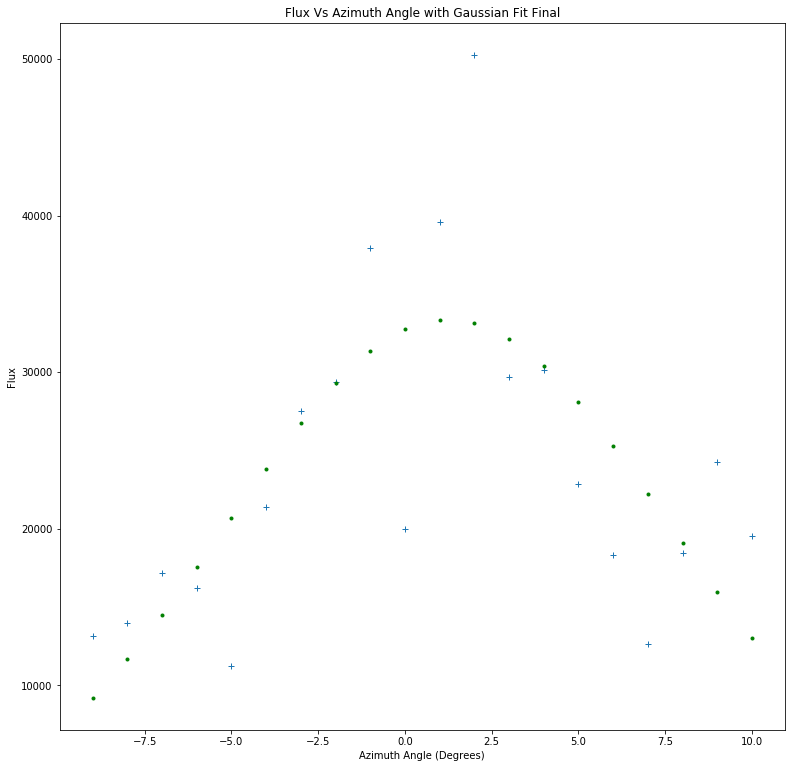

In [28]:
a0,b0,c0= (40000, 5, 4)
xforgaus = np.linspace(-9,10,20)
coeffs, fiterr = curve_fit(gaussian_curve, azimuth_final, az_spectrummean, p0= (a0,b0,c0))
print ("The values for amplitude, sigma, and mu are: ")
print ("a=%s, b=%s, c=%s" % (coeffs[0], coeffs[1], coeffs[2]))
plt.plot(azimuth_final,az_spectrummean, '+')
plt.plot(azimuth_final,gaussian_curve(azimuth_final,*coeffs),'g.')
plt.xlabel("Azimuth Angle (Degrees)")
plt.ylabel("Flux")
plt.title("Flux Vs Azimuth Angle with Gaussian Fit Final")
plt.show()

The values for amplitude, sigma, and mu are: 
a=534339.802463677, b=6.387739585013434, c=1.2458135160393127


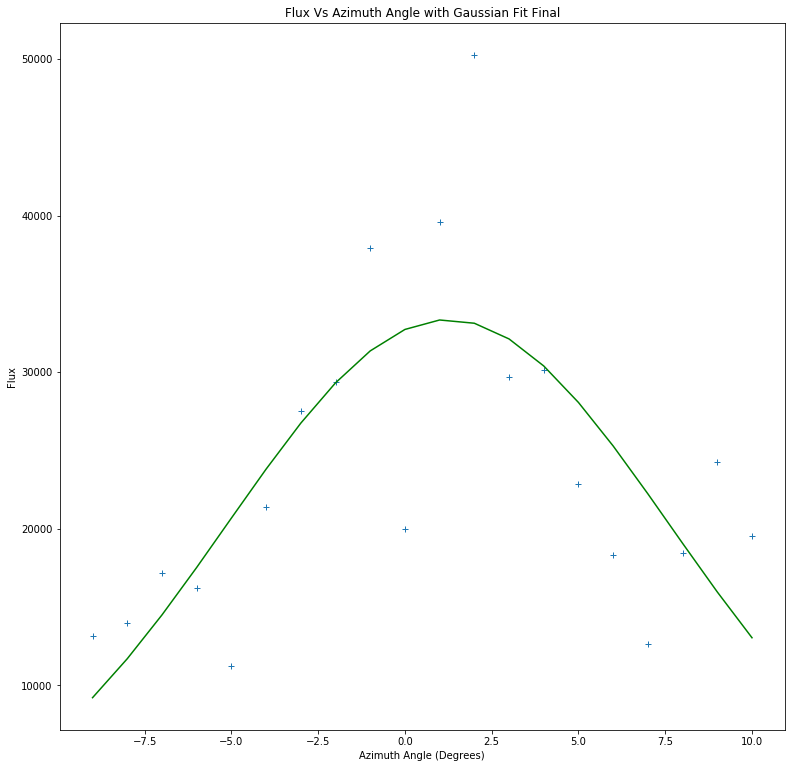

In [29]:
xforgaus = np.linspace(-9,10,20)
coeffs, fiterr = curve_fit(gaussian_curve, azimuth_final, az_spectrummean, p0= (a0,b0,c0))
print ("The values for amplitude, sigma, and mu are: ")
print ("a=%s, b=%s, c=%s" % (coeffs[0], coeffs[1], coeffs[2]))
plt.plot(azimuth_final,az_spectrummean, '+')
plt.plot(xforgaus,gaussian_curve(xforgaus,*coeffs),'g-')
plt.xlabel("Azimuth Angle (Degrees)")
plt.ylabel("Flux")
plt.title("Flux Vs Azimuth Angle with Gaussian Fit Final")
plt.show()

In [39]:
b = 6.387695527131033
sigma = b
full_width = 2*np.sqrt(2*np.log(2))*sigma
print("The full width of the gaussian curve at half the maximum for azimuth is: ", full_width, " radians")

The full width of the gaussian curve at half the maximum for azimuth is:  15.041873468842693  radians


In [31]:
el_spectra = [] # Create an empty array to later hold each of the spectra from the azimuthal scans

for el_file in el_files: #Pull each individual filename from the list of azimuth files
    
    with open(el_file) as el_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows2 = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row2 in enumerate(el_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows2.append(row2) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum2 = np.zeros(1024) #Create an array of 1024 0's.
        for row2 in spectrum_rows2: 
            temp_spec2 = row2.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec2 = [] # Create an empty list to hold the spectral data
            for val2 in temp_spec2: # Iterate over the elements of your split list.
                if val2 != '' and val2 != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec2.append(val2) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum2 = tot_spectrum2 + np.float64(spec2) # Add the data from the current row to your total spectral data for this file.
            
        el_spectra.append(tot_spectrum2)

Text(0.5, 1.0, 'All Elevation Spectra Plotted Along Frequency')

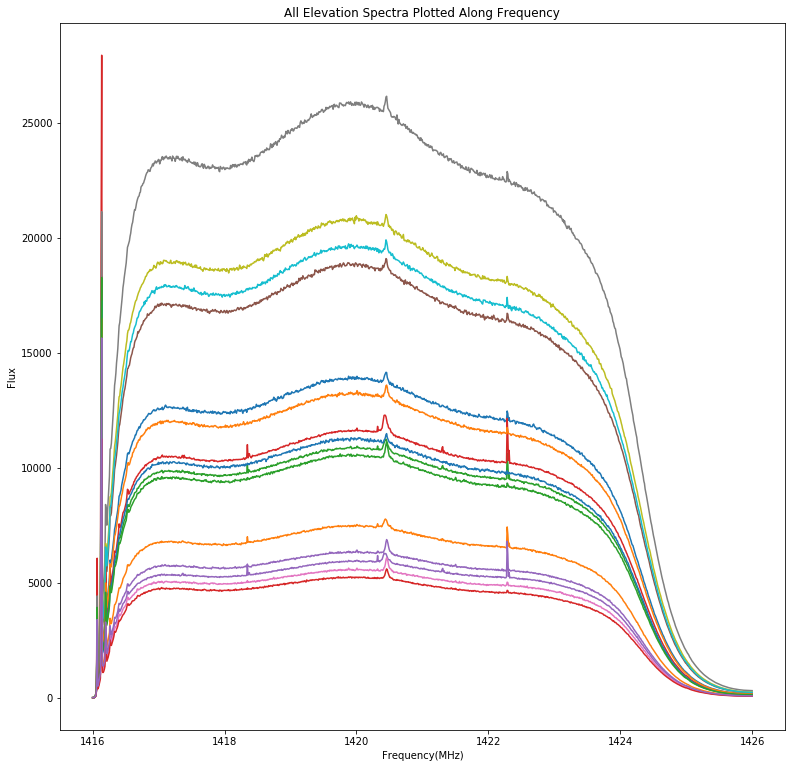

In [32]:
frequency = np.linspace(1416,1426,1024)#Fill with an array of numbers should have 1024 elements first one has 1416 

for i in range (0,len(el_spectra)):
    plt.plot(frequency, el_spectra[i])   
plt.xlabel("Frequency(MHz)")
plt.ylabel("Flux")
plt.title("All Elevation Spectra Plotted Along Frequency")

The initial and final frequency for our range: 
1416.215053763441
1424.3088954056695


Text(0.5, 1.0, 'All Elevation Spectra Plotted Along Frequency Adjusted to Range')

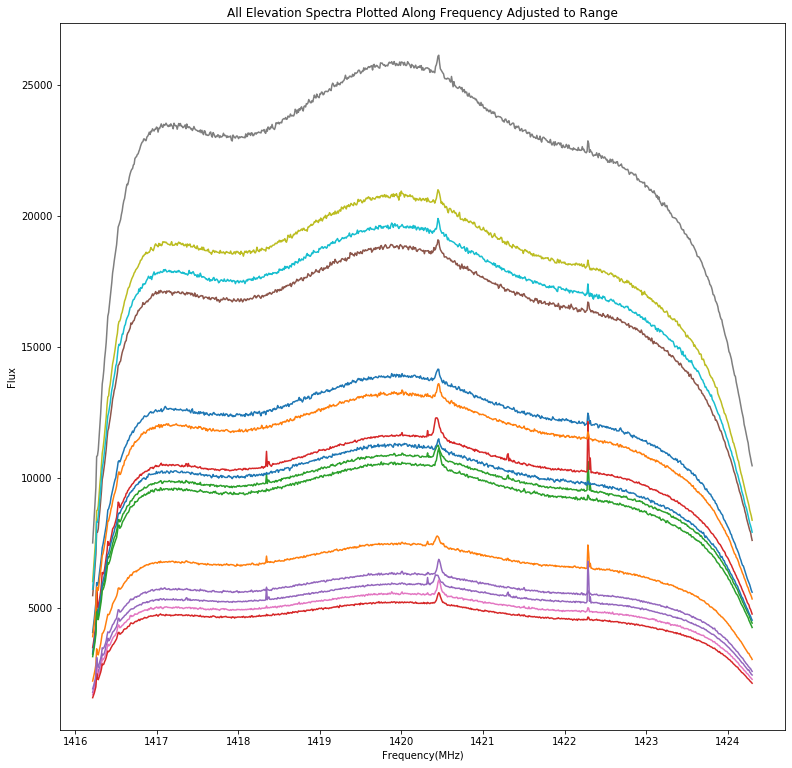

In [33]:
for i in range (0,len(el_spectra)):
    plt.plot(frequency[22:850],el_spectra[i][22:850])  
print("The initial and final frequency for our range: ")
print(frequency[22])
print(frequency[850])
    
plt.xlabel("Frequency(MHz)")
plt.ylabel("Flux")
plt.title("All Elevation Spectra Plotted Along Frequency Adjusted to Range")

In [34]:
el_spectrummean = np.zeros(len(el_spectra))
for i in range (0,len(el_spectra)):
    el_spectrummean[i] = np.mean(el_spectra[i][22:850]) 
print("The averages for all elevation spectra at the given frequency range: ")
print(el_spectrummean)

The averages for all elevation spectra at the given frequency range: 
[12008.09239493  6484.81671135  9421.83372947 10093.00730797
  5158.57622343 16281.95625121  4832.998093   22338.66234541
 17977.80289493 16962.92524396  9722.94351087 11433.96899879
  9122.66056039  4536.87883575  5494.21781039]


Text(0.5, 1.0, 'Flux vs Elevation Angle')

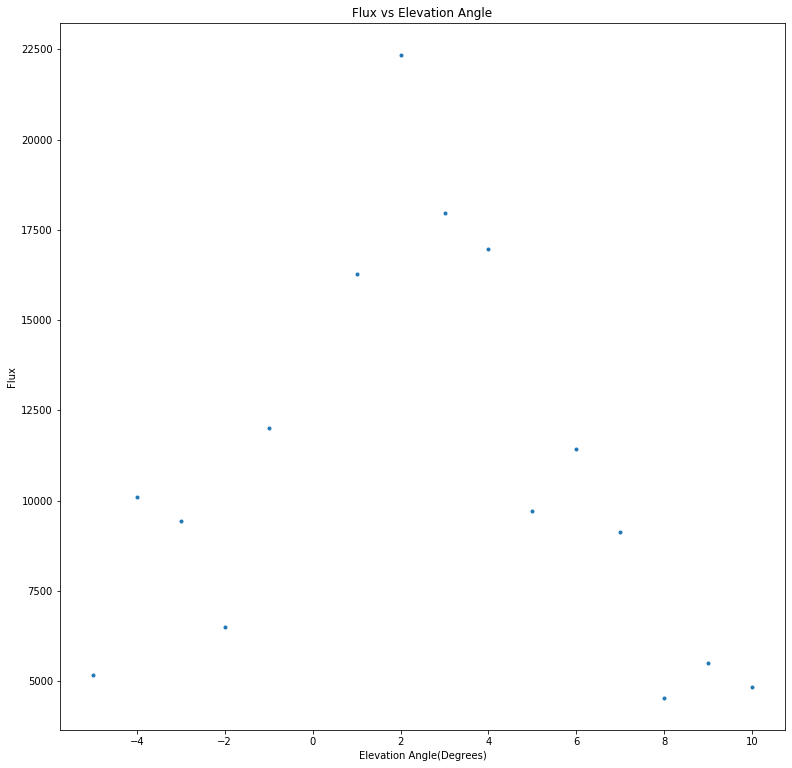

In [35]:
elevation_final = np.array([-1,-2,-3,-4,-5,1,10,2,3,4,5,6,7,8,9])
plt.plot(elevation_final, el_spectrummean, '.')
plt.xlabel("Elevation Angle(Degrees)")
plt.ylabel("Flux")
plt.title("Flux vs Elevation Angle")

The estimates for amplitude, sigma and mu: 
a=40000, b=2, c=3


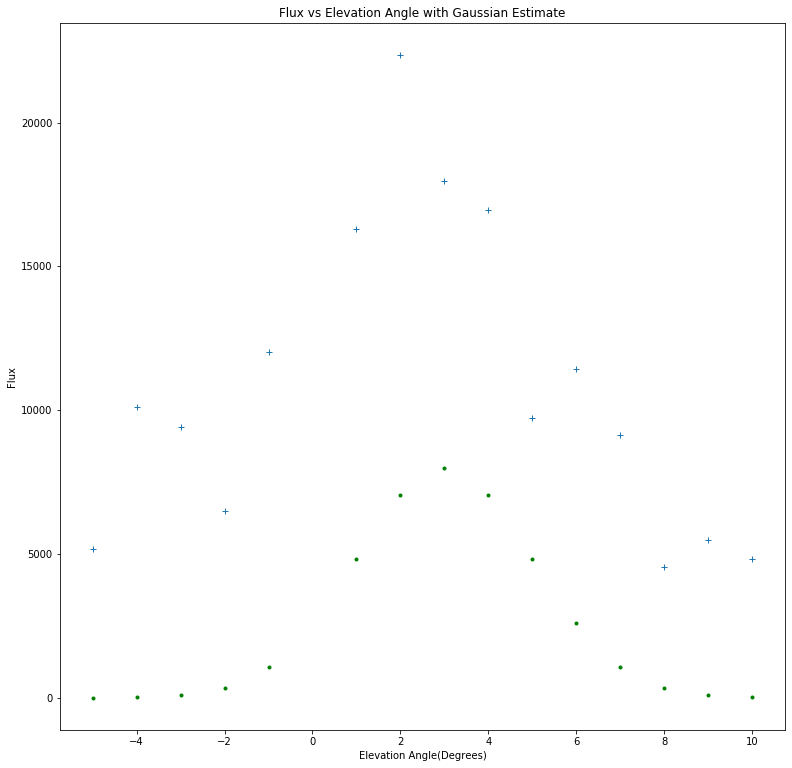

In [36]:
def gaussian_curve(x,a,b,c): #a= amplitude b=sigma, c=mu
    return a*(1/(b*np.sqrt(2*np.pi)))*np.exp((-0.5)*(((x-c)/b)**2))
a0,b0,c0= (40000, 2, 3)

plt.plot(elevation_final,el_spectrummean, '+')
plt.plot(elevation_final, gaussian_curve(elevation_final,a0,b0,c0),'g.')
plt.xlabel("Elevation Angle(Degrees)")
plt.ylabel("Flux")
plt.title("Flux vs Elevation Angle with Gaussian Estimate")
print ("The estimates for amplitude, sigma and mu: ")
print ("a=%s, b=%s, c=%s" % (a0,b0,c0))

The final values for amplitude, sigma, and mu: 
a=186119.29483795929, b=4.178389034978895, c=2.023409486941085


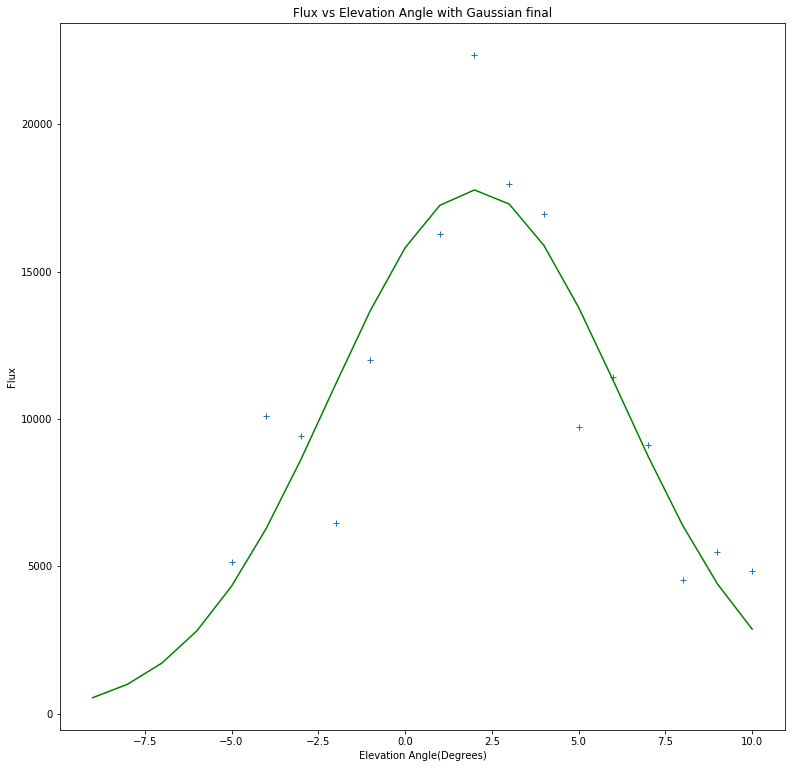

In [37]:
xforgaus = np.linspace(-9,10,20)
coeffs, fiterr = curve_fit(gaussian_curve, elevation_final, el_spectrummean, p0= (a0,b0,c0))
print("The final values for amplitude, sigma, and mu: ")
print ("a=%s, b=%s, c=%s" % (coeffs[0], coeffs[1], coeffs[2]))
plt.plot(elevation_final,el_spectrummean, '+')
plt.plot(xforgaus,gaussian_curve(xforgaus,*coeffs),'g-')
plt.xlabel("Elevation Angle(Degrees)")
plt.ylabel("Flux")
plt.title("Flux vs Elevation Angle with Gaussian final")
plt.show()

In [40]:
b = 4.178389034978895
sigma = b
full_width = 2*np.sqrt(2*np.log(2))*sigma
print("The full width of the gaussian curve at half the maximum for elevation is: ", full_width, "radians")

The full width of the gaussian curve at half the maximum for elevation is:  9.839354255505825 radians
